In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline
from google.colab import files

In [334]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [335]:
df=pd.read_csv("/content/Algerian_forest_fires_dataset_UPDATE1.csv")

In [336]:
df.head()

,Unnamed: 0,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [337]:
df.columns

Index(['Unnamed: 0', 'temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc',
       'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

In [338]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [339]:
df.columns

Index(['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
       'fwi', 'classes', 'region'],
      dtype='object')

In [340]:
df["classes"].value_counts()

,count
classes,
fire,137
not fire,106


In [341]:
df["classes"]=df["classes"]=="fire"

In [342]:
df["classes"].value_counts()

,count
classes,
True,137
False,106


In [343]:
df["classes"]=df["classes"].astype(int)

In [344]:
df["classes"].value_counts()

,count
classes,
1,137
0,106


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  243 non-null    int64  
 1   rh           243 non-null    int64  
 2   ws           243 non-null    int64  
 3   rain         243 non-null    float64
 4   ffmc         243 non-null    float64
 5   dmc          243 non-null    float64
 6   dc           243 non-null    float64
 7   isi          243 non-null    float64
 8   bui          243 non-null    float64
 9   fwi          243 non-null    float64
 10  classes      243 non-null    int64  
 11  region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [346]:
df.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [347]:
x=df.drop("classes",axis=1)
y=df["classes"]

In [348]:
corr_data=df.corr()

In [349]:
corr_data

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
rh,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
ffmc,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
dmc,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
dc,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
isi,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
bui,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
fwi,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [350]:
len(corr_data)

12

In [351]:
def high_correlation(dataset,threshold):
  corr_columns=set()
  corr_matrix=dataset.corr()
  n=len(corr_matrix)

  for i in range(n):
    for j in range(i):
      if corr_matrix.iloc[i,j]>=threshold:
        col_name=corr_matrix.columns[i]
        corr_columns.add(col_name)

  return corr_columns


In [352]:
def delete_high_correlation(dataset,threshold):
  corr_columns=high_correlation(dataset,threshold)
  dataset.drop(columns=corr_columns,inplace=True)
  return dataset

In [353]:
print("columns with high correlation")
print("threshold : columns")
threshold=[0.75,0.8,0.85,0.9,0.95]
for i in threshold:
  corr_col=high_correlation(df,i)
  print(f"{i} : {corr_col}")

columns with high correlation
threshold : columns
0.75 : {'fwi', 'bui', 'classes', 'dc'}
0.8 : {'fwi', 'bui', 'dc'}
0.85 : {'fwi', 'bui', 'dc'}
0.9 : {'fwi', 'bui'}
0.95 : {'bui'}


In [354]:
threshold=0.95
df=delete_high_correlation(df,threshold)

In [355]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=142)

In [356]:
scaler=StandardScaler()

In [357]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [358]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(194, 11)
(49, 11)
(194,)
(49,)


In [359]:
df.columns

Index(['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'fwi',
       'classes', 'region'],
      dtype='object')

In [360]:
def standardize_data(x,y,scaler):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=142)
  x_train_scaled=scaler.fit_transform(x_train)
  x_test_scaled=scaler.transform(x_test)
  return x_train_scaled,x_test_scaled,y_train,y_test

In [361]:
def model_prediction(x,y,scaler,model,metrics):
  x_train,x_test,y_train,y_test=standardize_data(x,y,scaler)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  model_name=model.__class__.__name__
  print(f"model evaluation of {model_name} : ")
  for metric in metrics:
    print(f"{metric.__name__} : {metric(y_test,y_pred)}")
  plt.scatter(x=y_test,y=y_pred)
  plt.xlabel("y_test")
  plt.ylabel("y_pred")
  plt.show()

model evaluation of LinearRegression : 
mean_absolute_error : 0.6694559170003037
mean_squared_error : 1.0407541980964077
r2_score : 0.9843306241923928


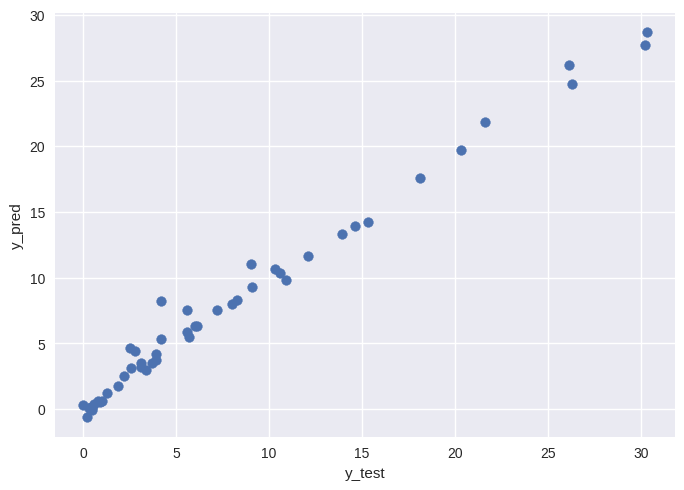

model evaluation of Lasso : 
mean_absolute_error : 1.475737719077609
mean_squared_error : 3.8948393569466715
r2_score : 0.941360119703689


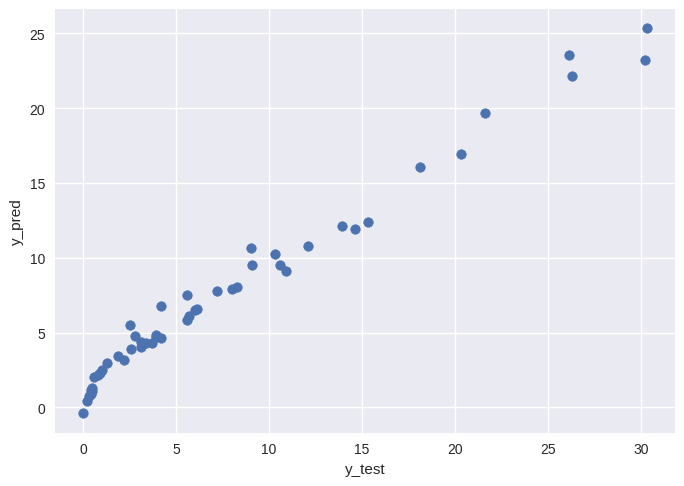

model evaluation of Ridge : 
mean_absolute_error : 0.6837336301184046
mean_squared_error : 1.0971866426966388
r2_score : 0.983480989202882


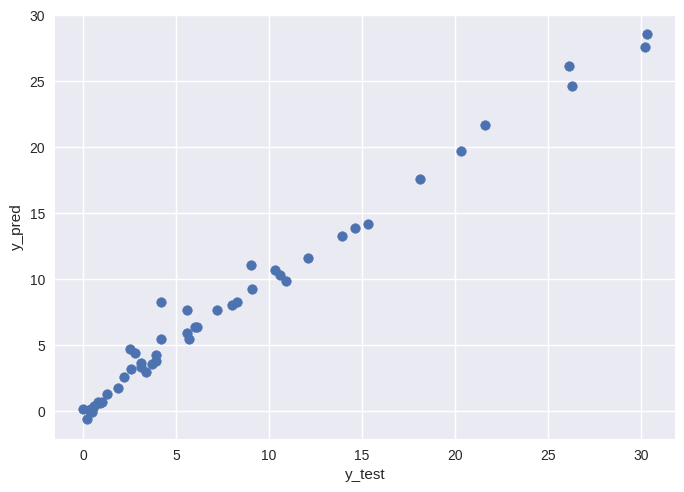

model evaluation of ElasticNet : 
mean_absolute_error : 2.1529031425558207
mean_squared_error : 8.060732529587753
r2_score : 0.8786393102984972


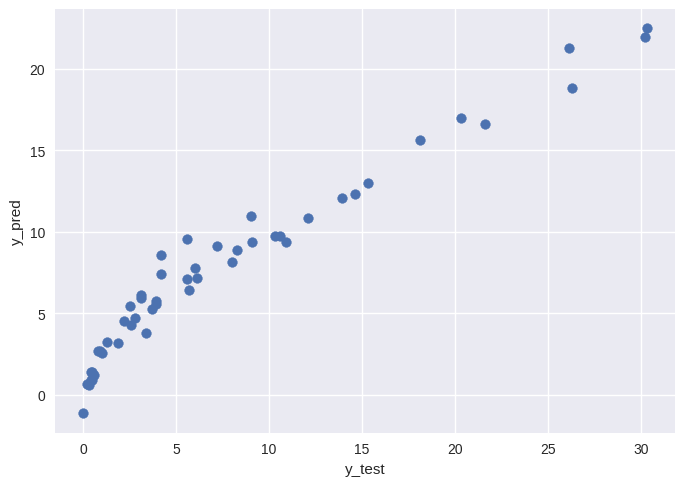

In [362]:
models=[LinearRegression(),Lasso(),Ridge(),ElasticNet()]
metrics=[mean_absolute_error,mean_squared_error,r2_score]
scaler=StandardScaler()
x=df.drop("fwi",axis=1)
y=df["fwi"]
for model in models:
  model_prediction(x,y,scaler,model,metrics)

In [363]:
0

0